# Introduction to Datasets

## Web Pages and Documentation

[Datasets home page:](https://www.ncbi.nlm.nih.gov/datasets)
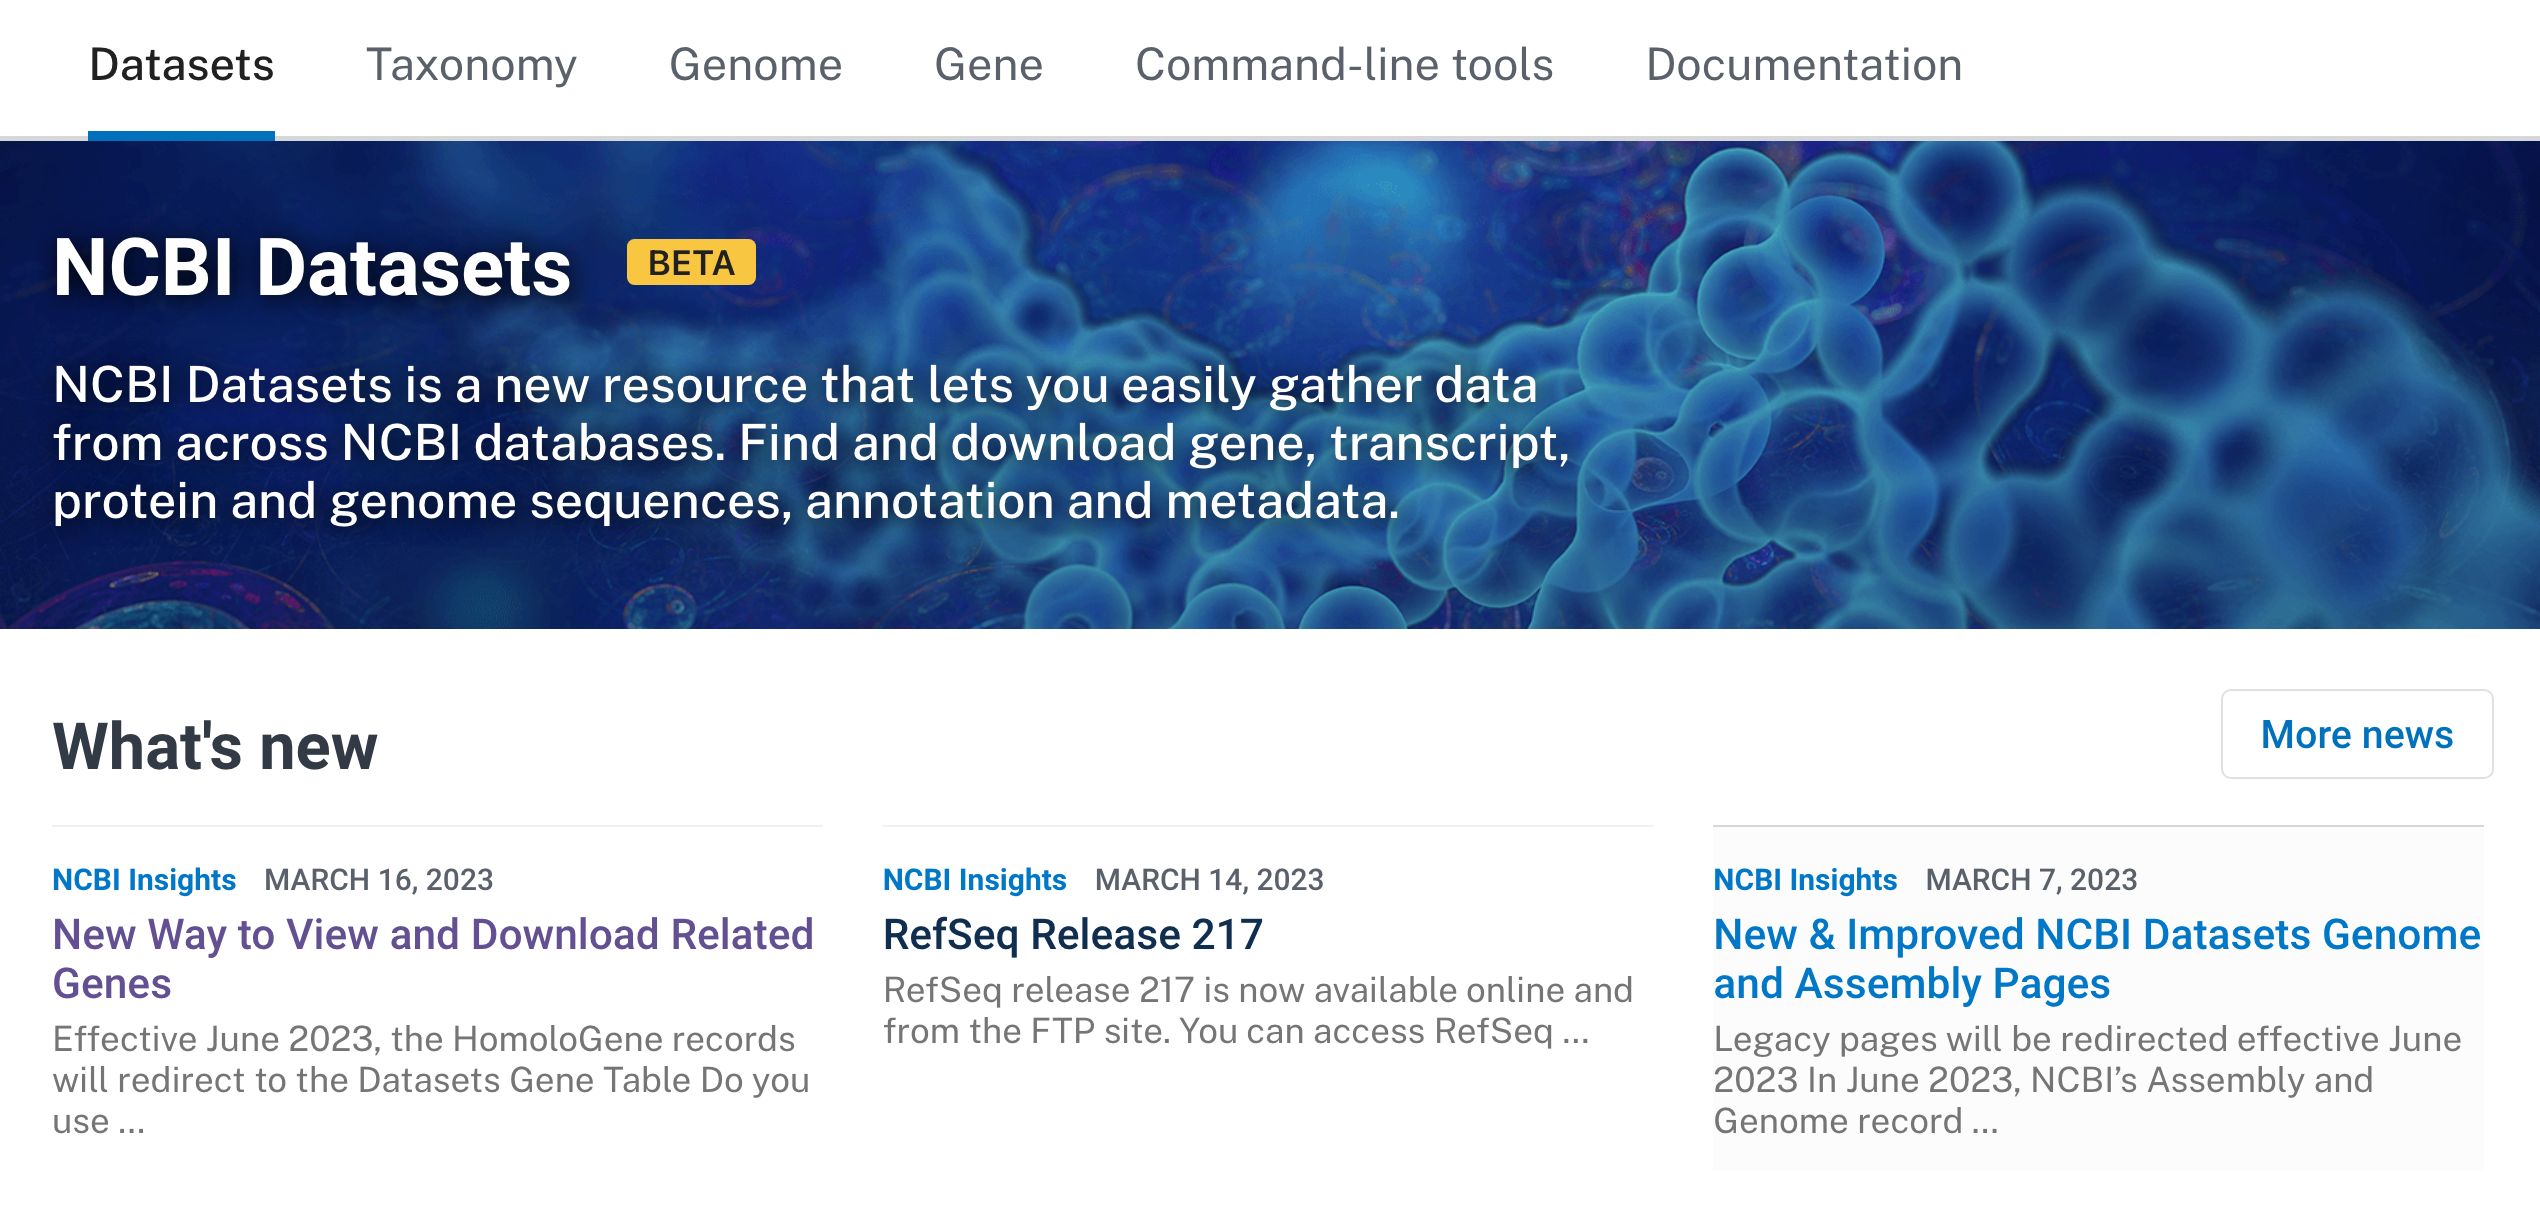
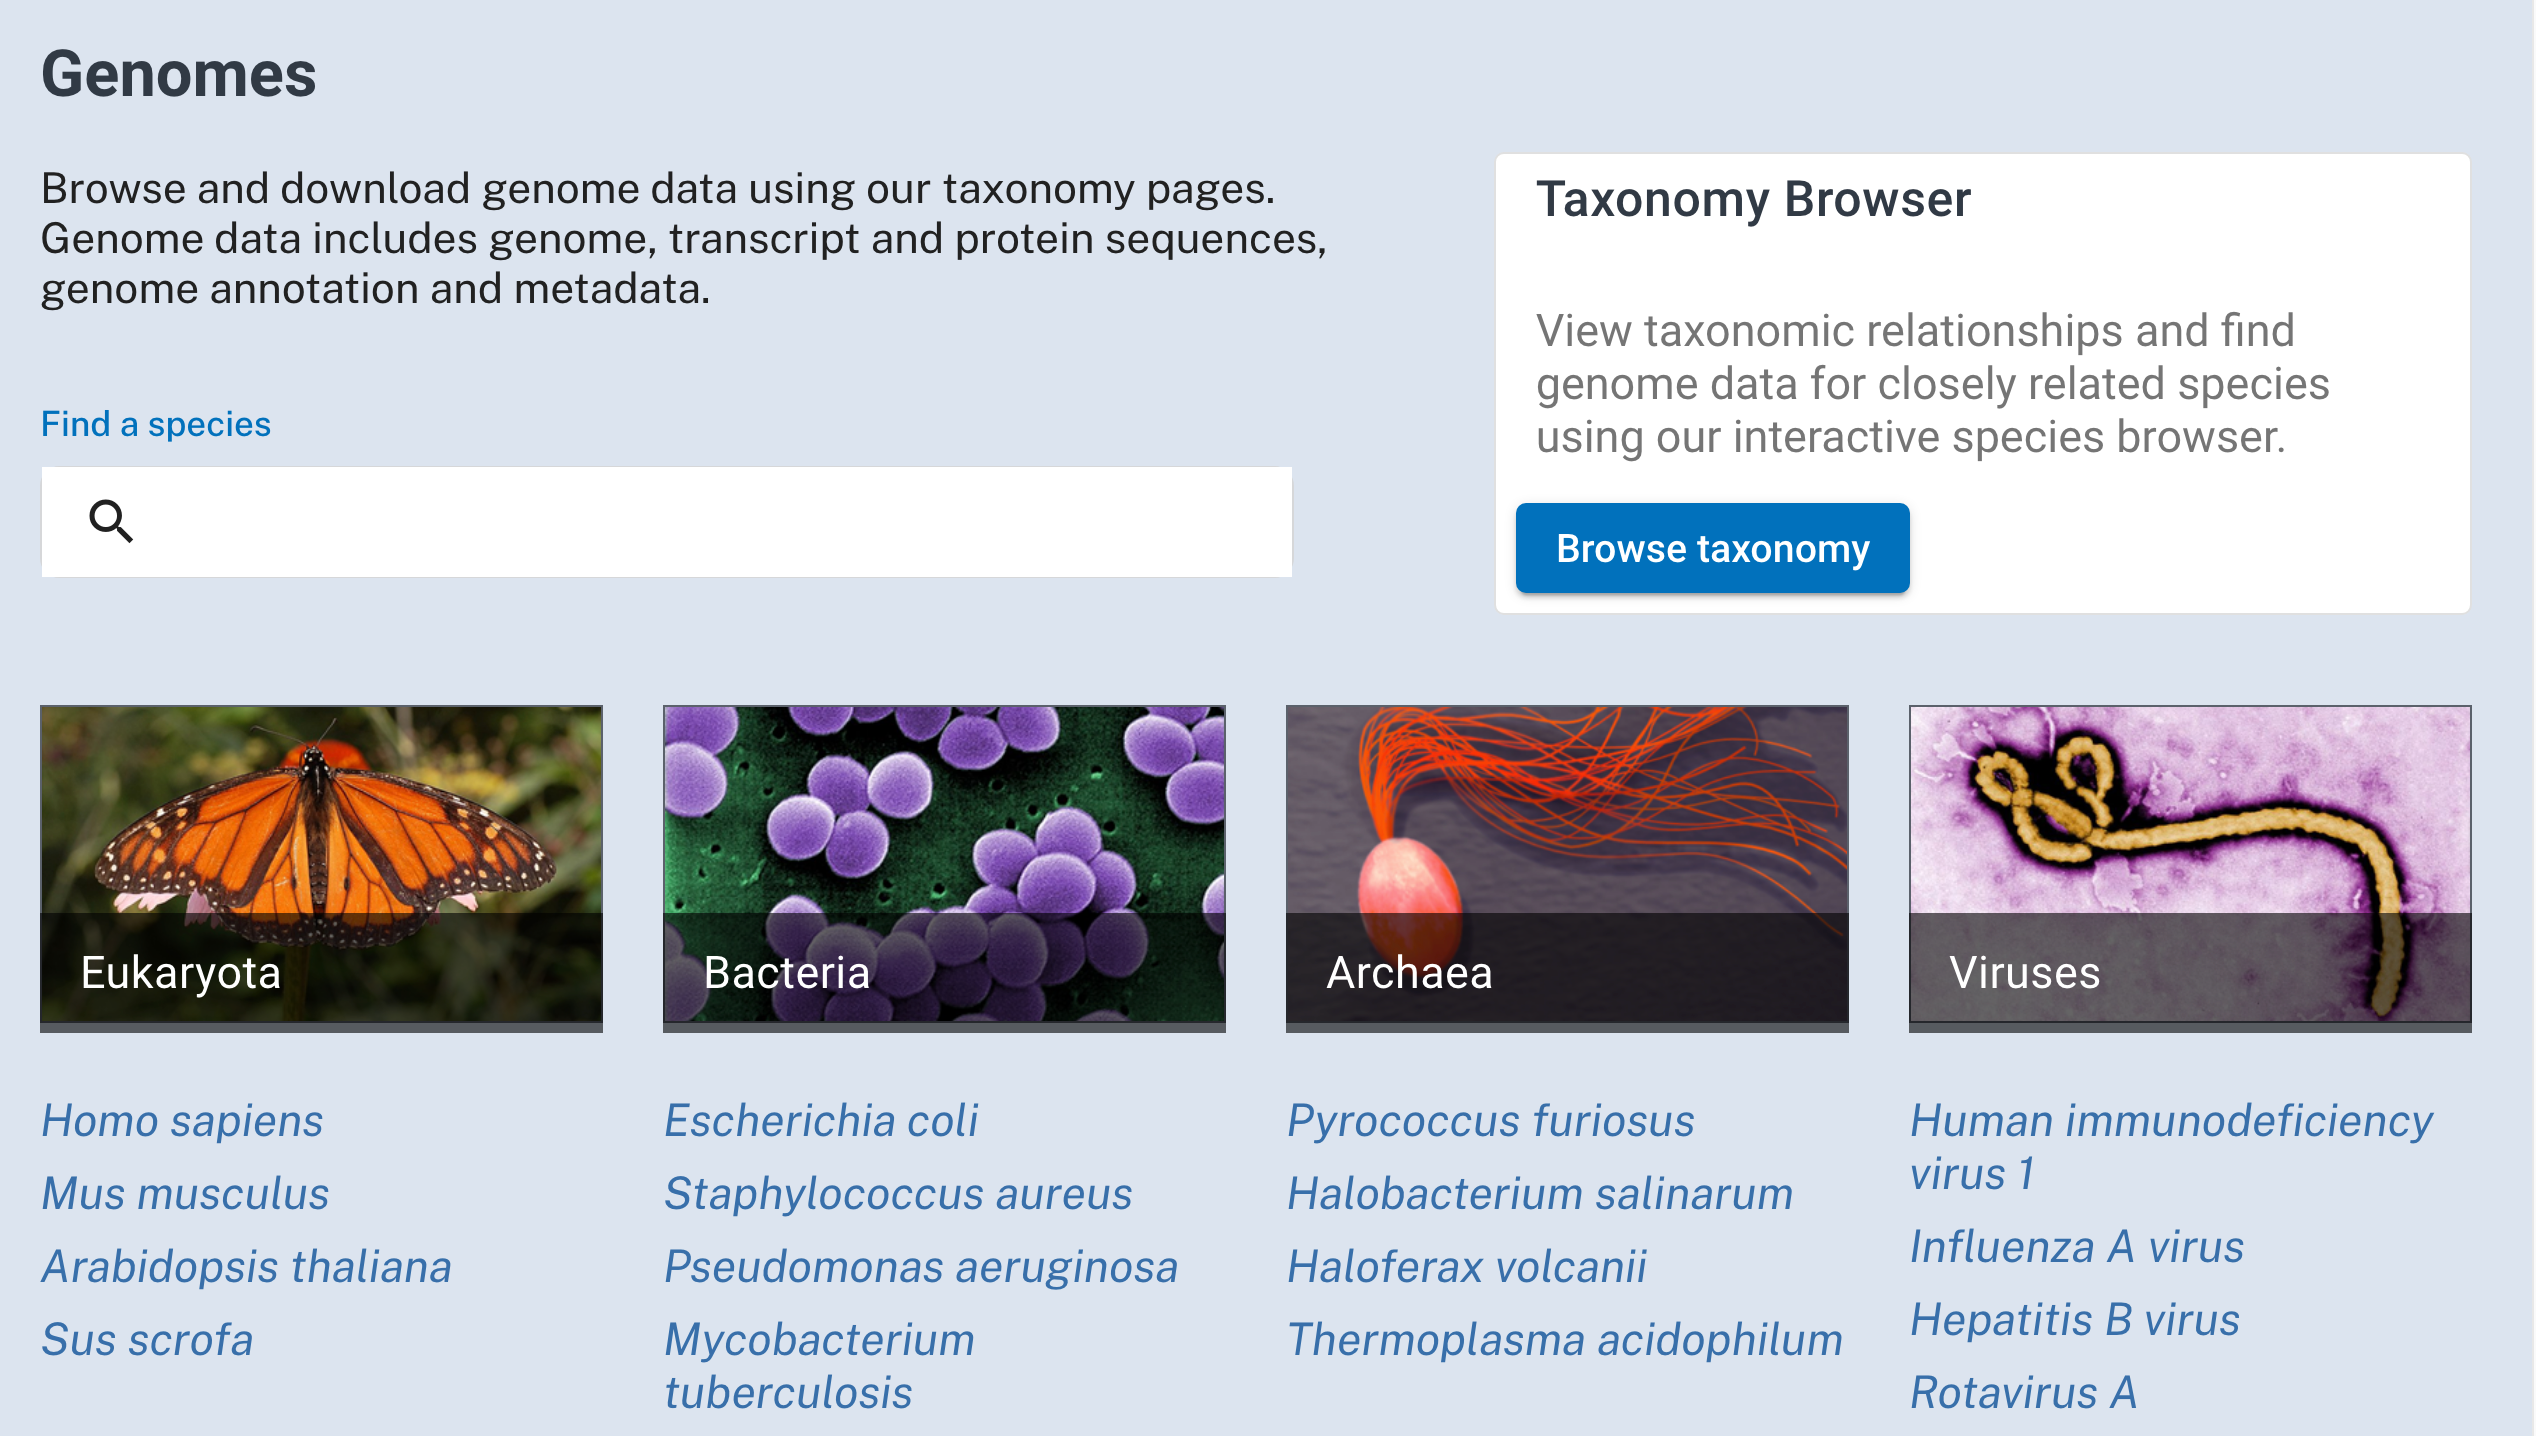
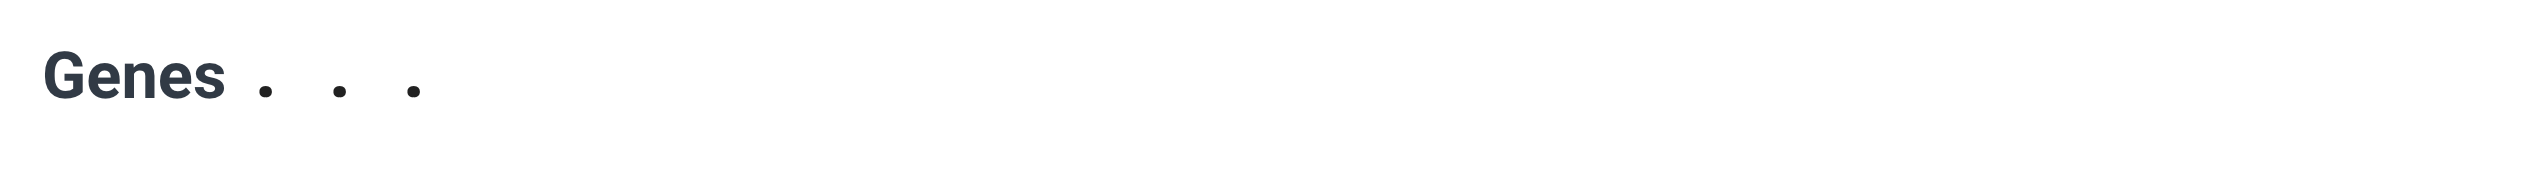
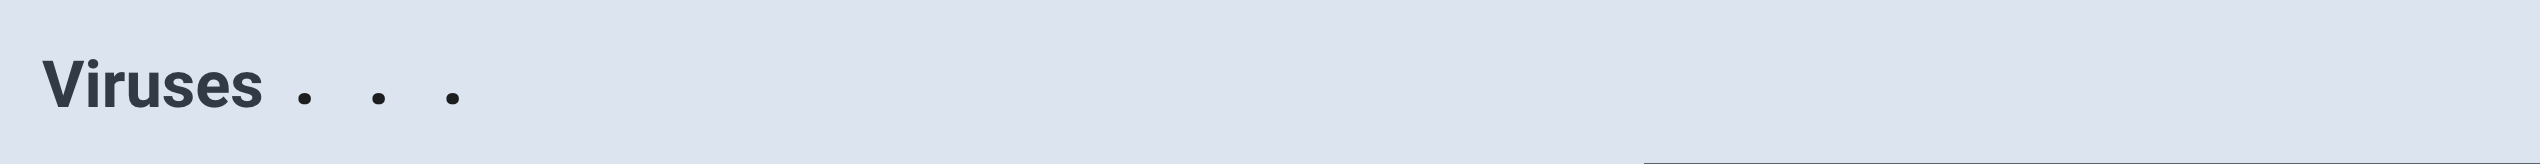
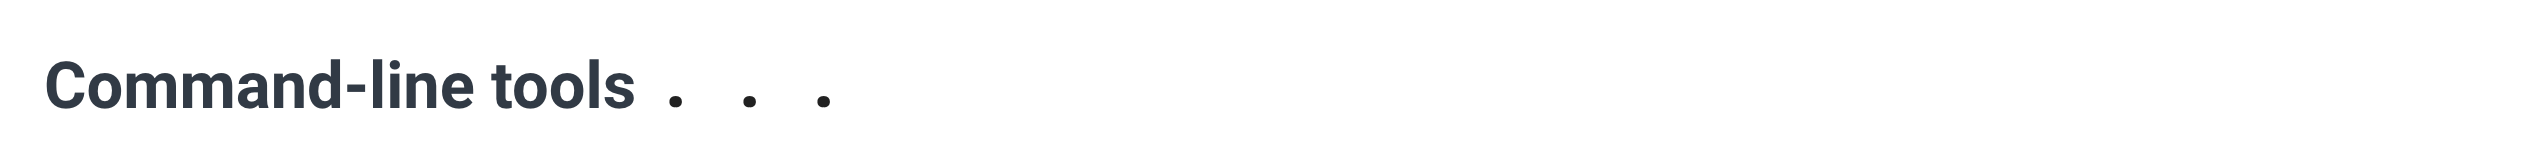

### Why use the Dastasets web pages?

- Access great documentation
    - [Download and install datasets & dataformat](https://www.ncbi.nlm.nih.gov/datasets/docs/v2/download-and-install)
    - [How To Guides](https://www.ncbi.nlm.nih.gov/datasets/docs/v2/how-tos/)
- See what data are available
- Perform simple tasks 
- Keep up with what's new

## Objective 1 - Understand commandline syntax and get help <a class="anchor" id="Objective-1"></a>

#### This graphic is from the page, [Download and install datasets & dataformat](https://www.ncbi.nlm.nih.gov/datasets/docs/v2/download-and-install):
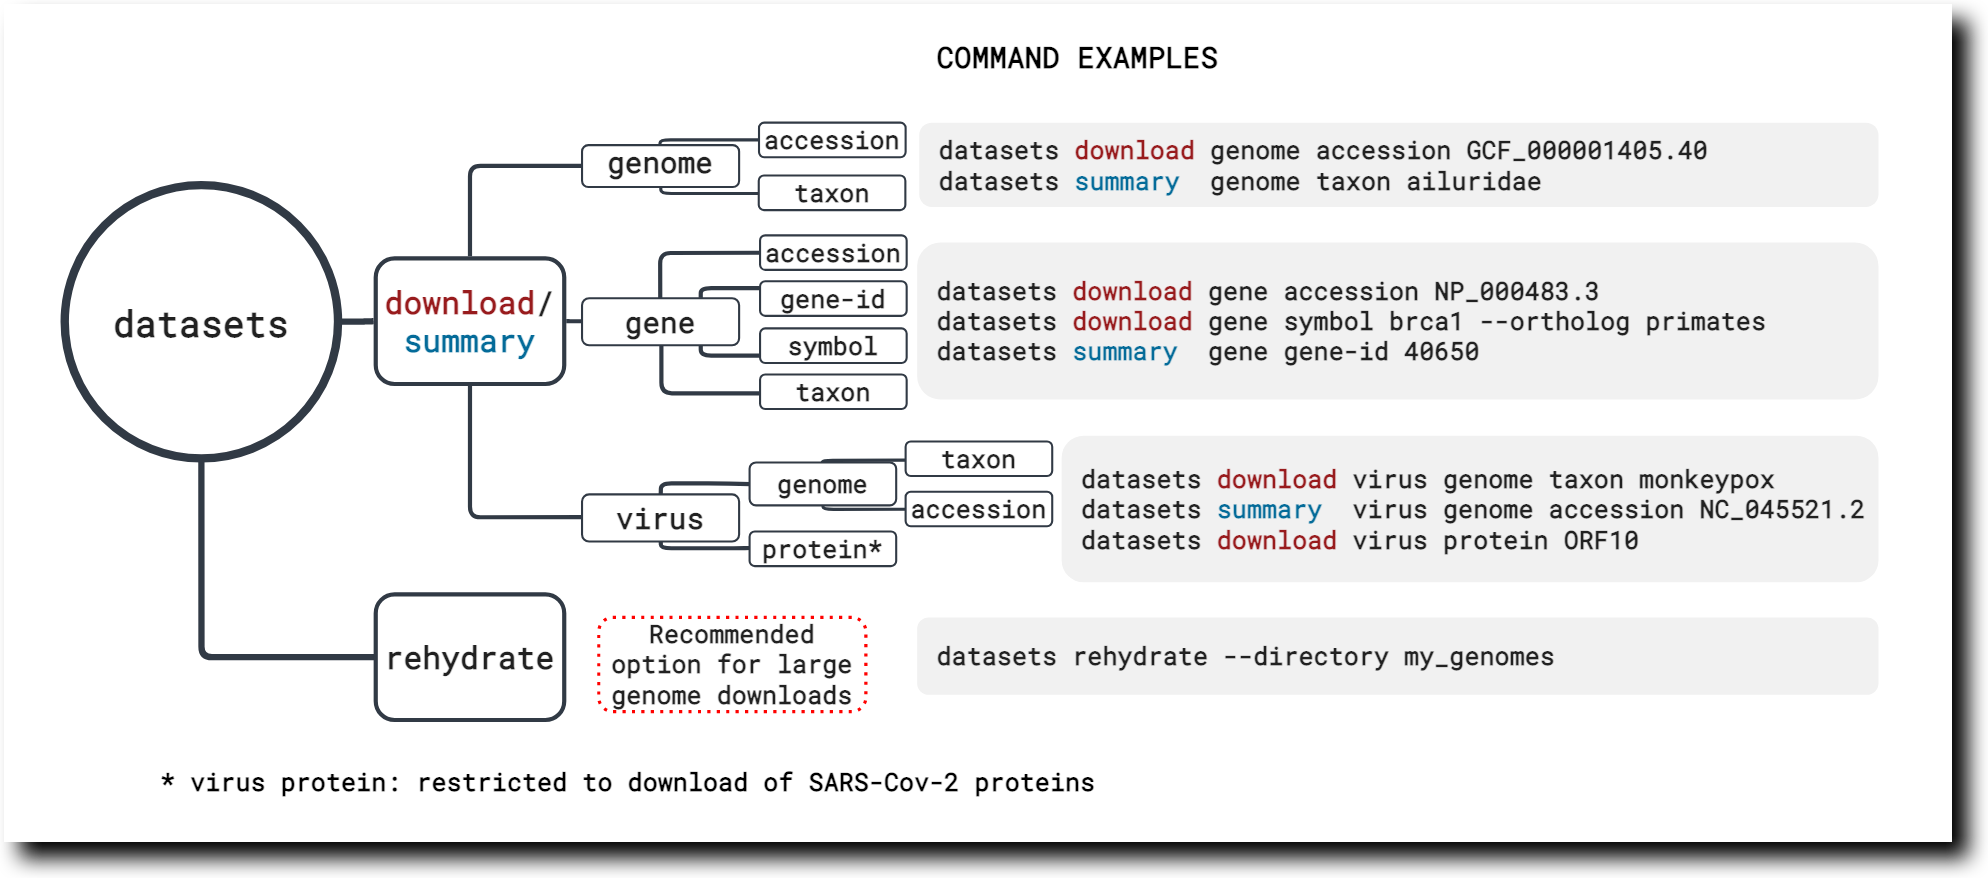

#### Let's deconstruct part of a command line we'll be using later:

<p style="font-family: courier; font-size:12pt">
    datasets summary genome taxon "Klebsiella pneumoniae" --assembly-level complete --assembly-source refseq
</p>
<div>
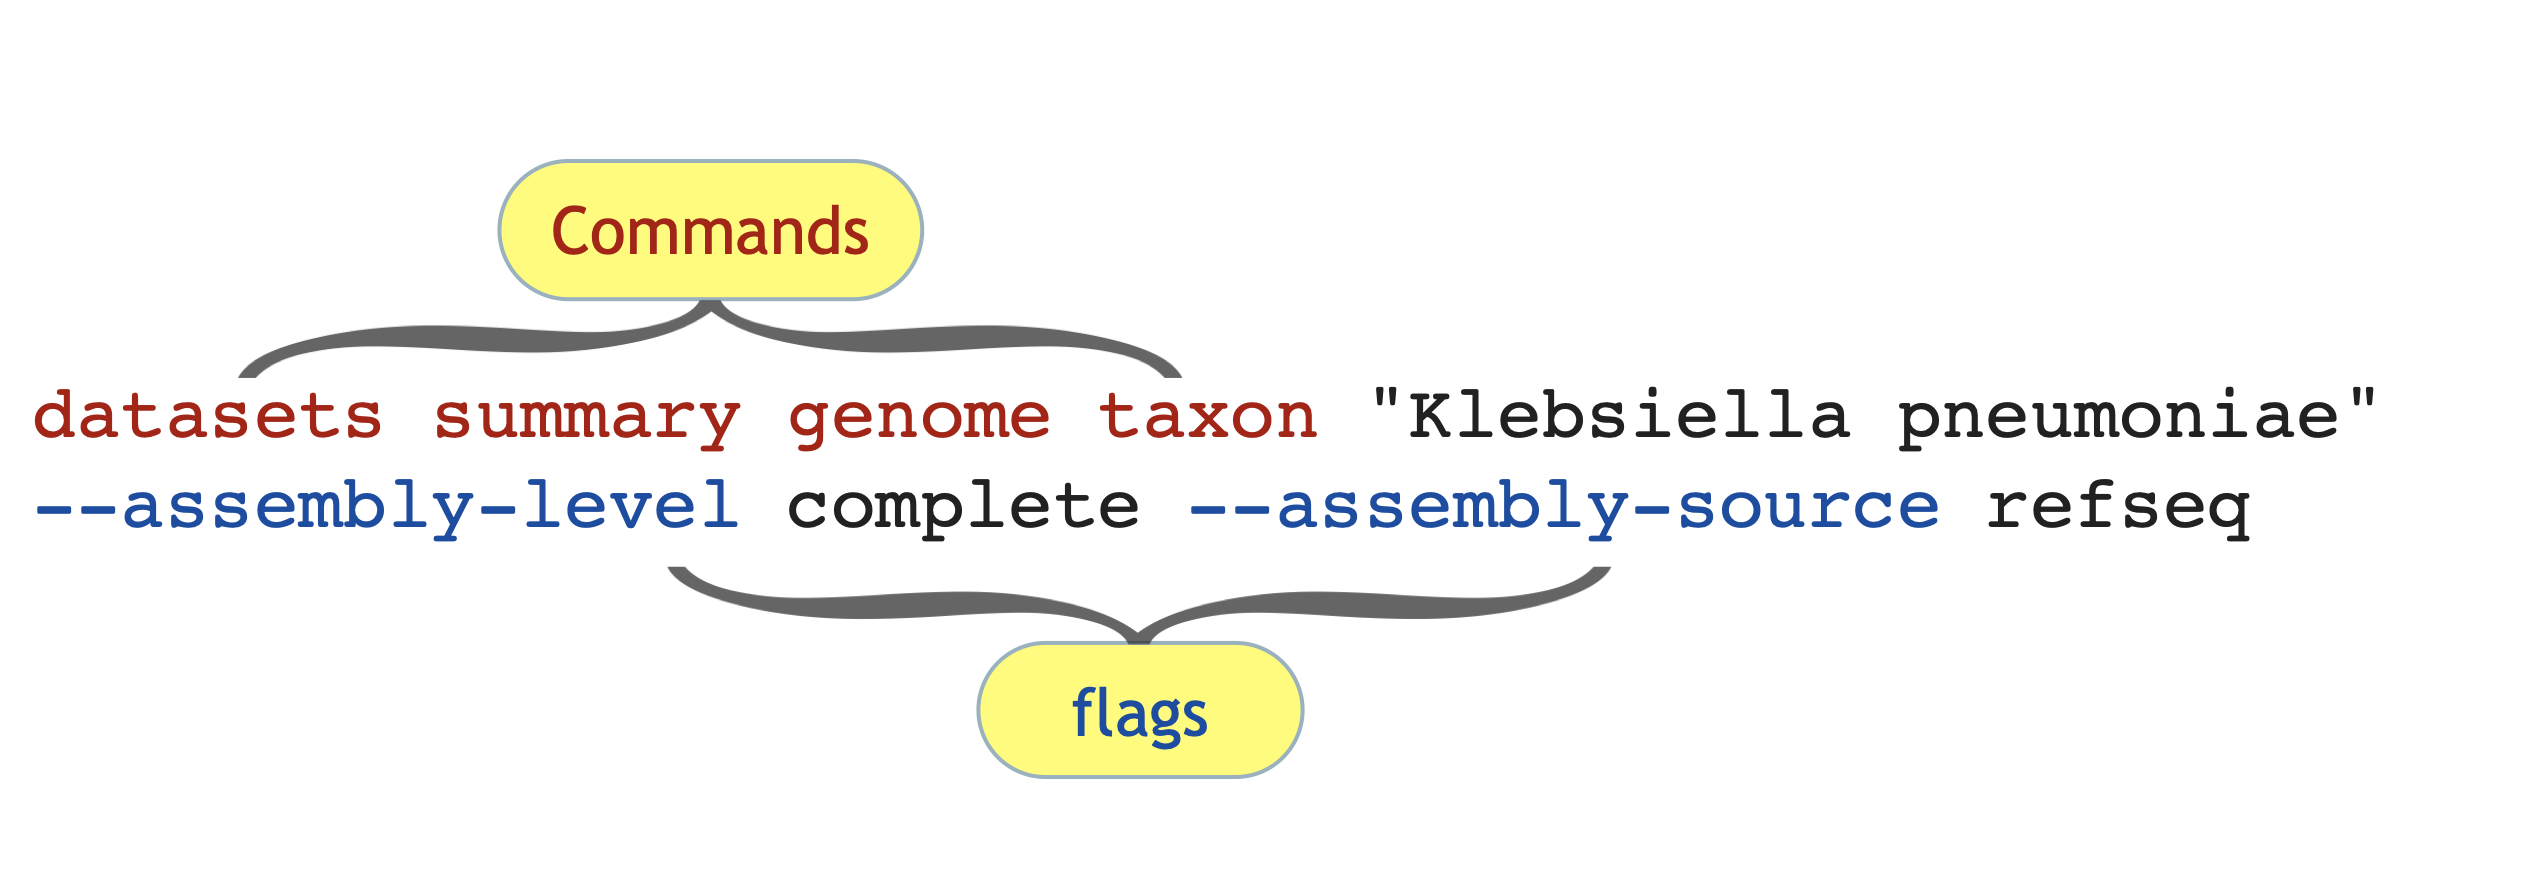
</div>

#### How to get help on the command line:

In [ ]:
datasets summary genome taxon --help

In [ ]:
datasets download genome accession --help

## Objective 2 - Find assembly accessions for *Klebsiella pneumoniae* genome records from India, where the sample source is blood <a class="anchor" id="Objective-2"></a>

#### Partial GenBank view of a genome record showing country and isolation source:
</br>
<div>
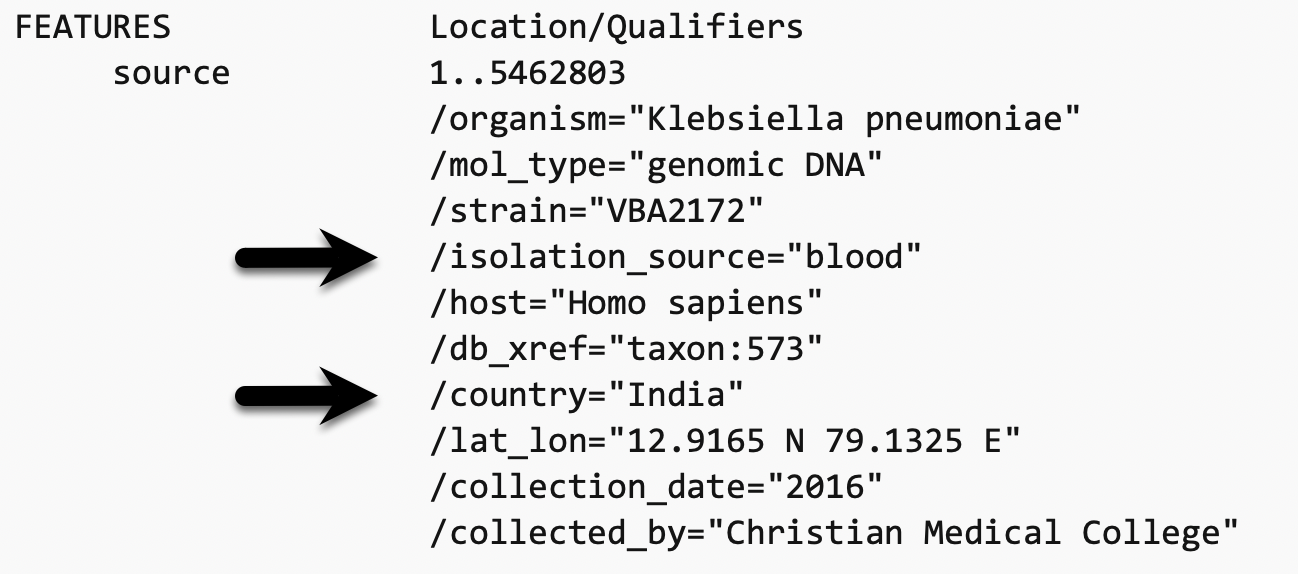
</div>

### Approach:
- Use `datasets summmary genome taxon` to get metadata
- Use `dataformat tsv genome --fields` to pull out records containing specified fields
- Use common bash commands to parse country=India and isolation_source=blood

#### Find available fields:

In [ ]:
dataformat tsv genome taxon --help

#### Explore a BioSample record to find Attributes:


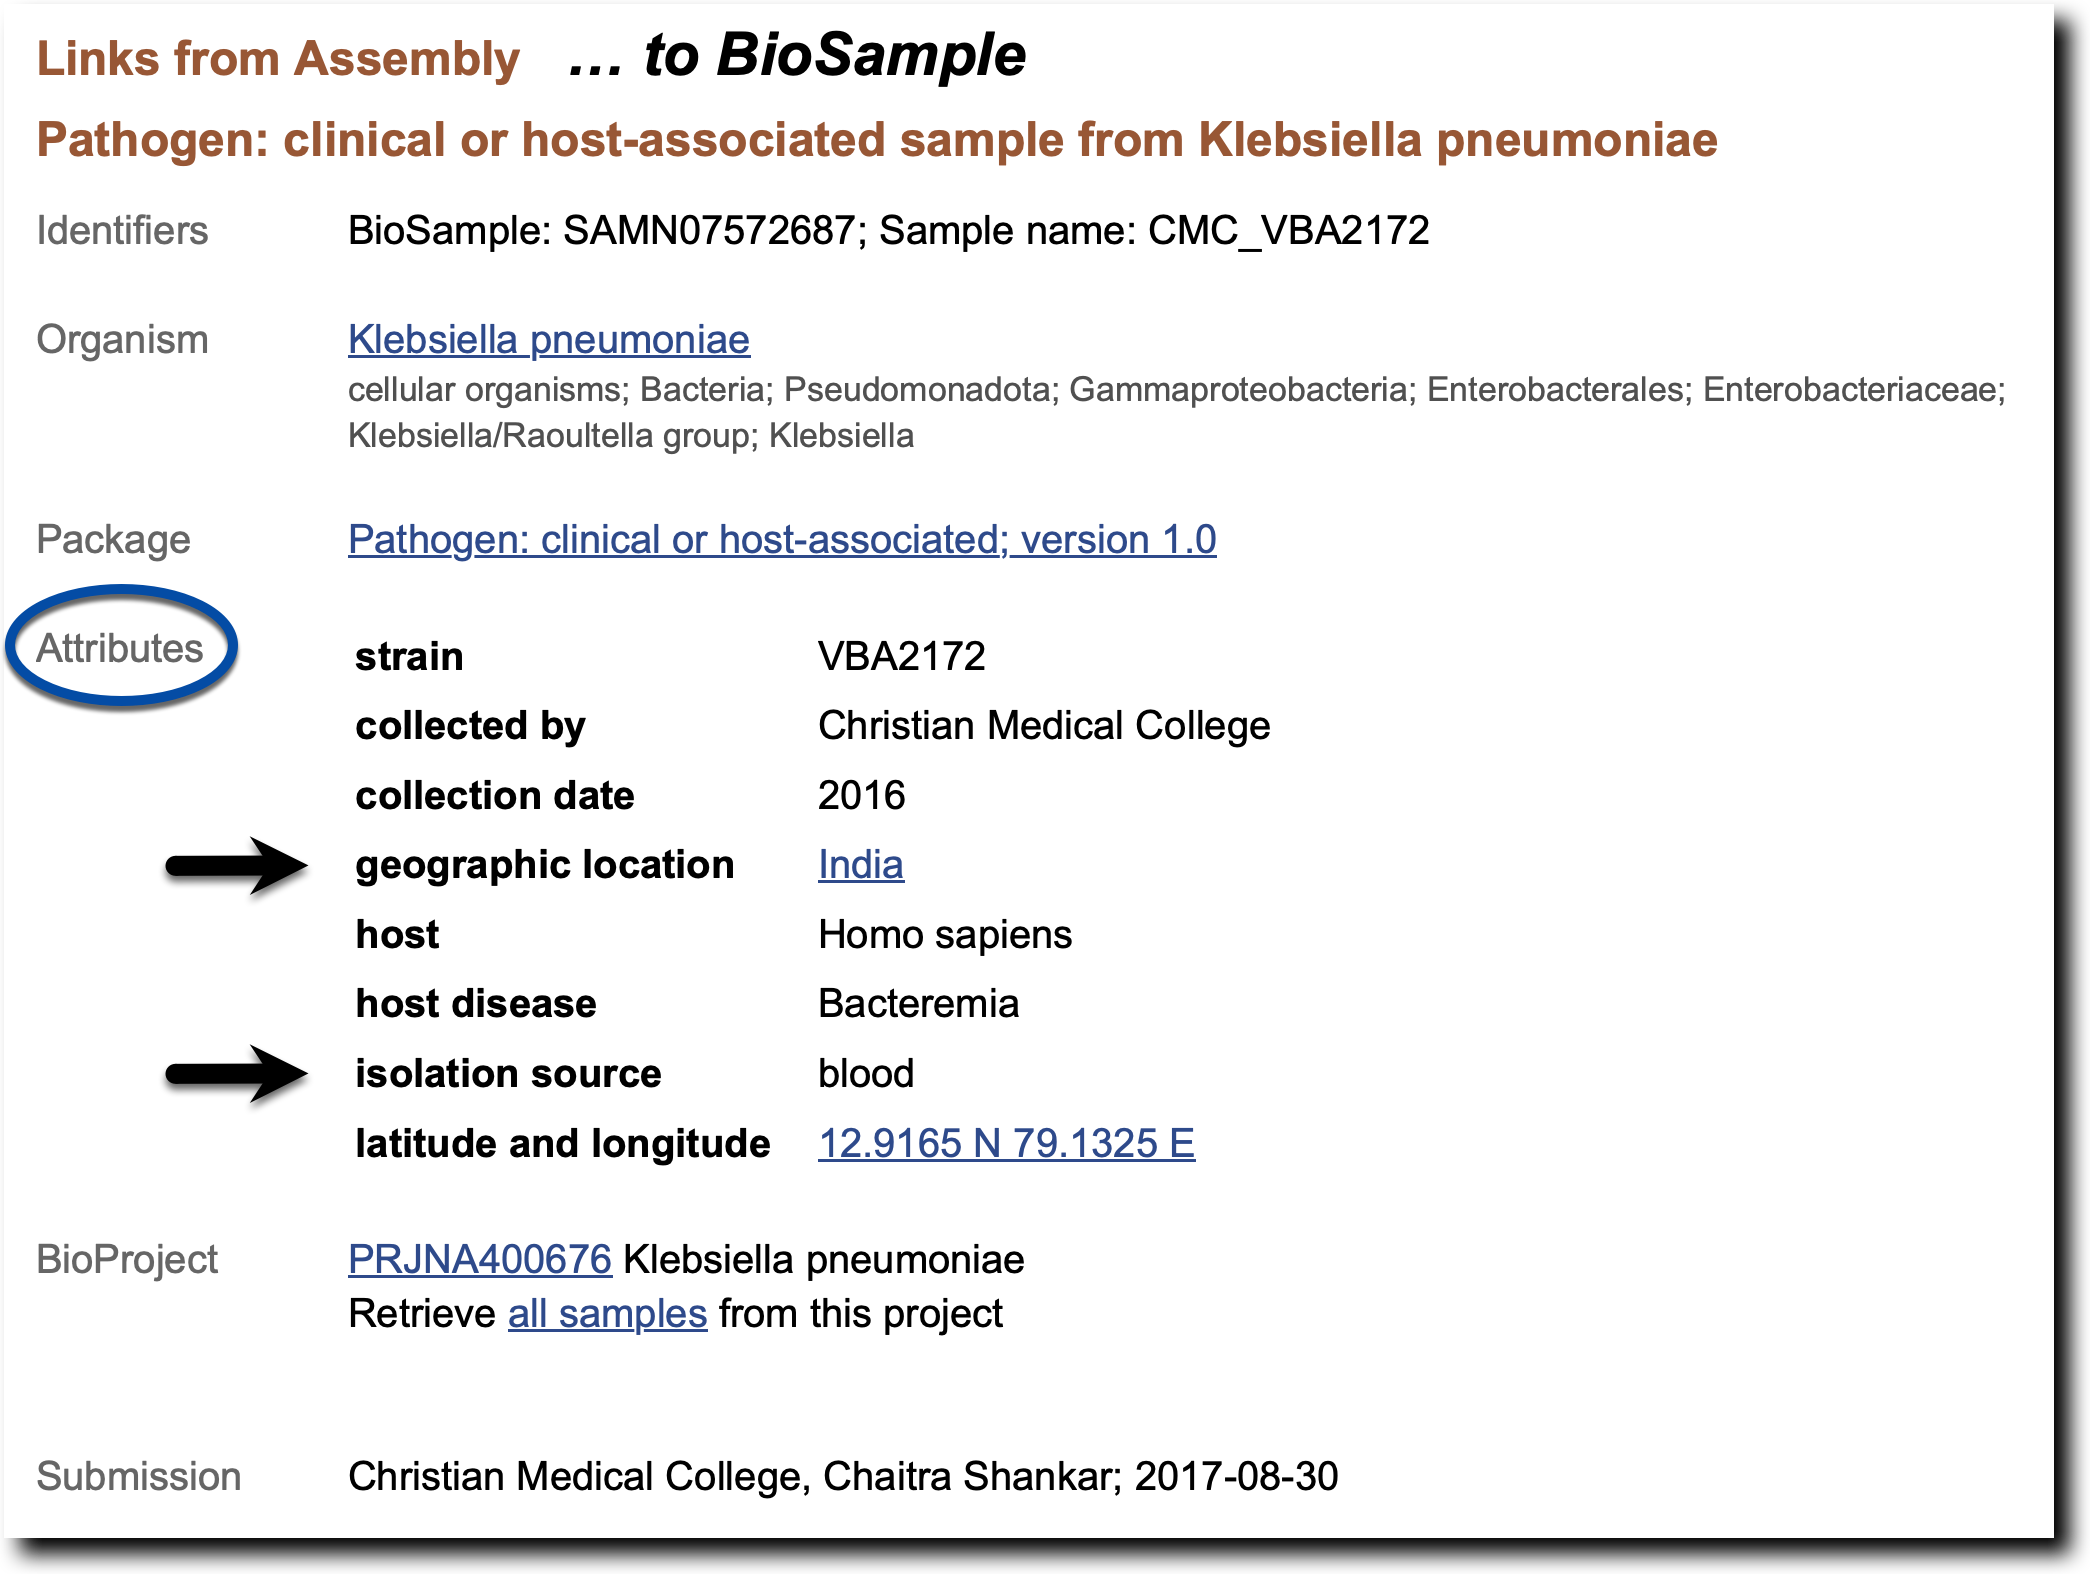

### Commands (datasets and dataformat)

In [4]:
datasets summary genome taxon "Klebsiella pneumoniae" --assembly-level complete --assembly-source refseq --as-json-lines | dataformat tsv genome --fields accession,assminfo-biosample-attribute-name,assminfo-biosample-attribute-value > kleb_attributes.out

New version of client (14.22.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/linux-amd64/datasets


In [ ]:
head -n30 kleb_attributes.out

**NOTE:** Assemblies are grouped by accession; not all assemblies have the same attributes.

#### Use bash commands to parse assembly accessions where geo_loc_name = India and isolation_source = blood:

In [ ]:
#One possibility
grep 'geo_loc_name\|isolation_source' kleb_attributes.out | grep -A1 India | grep blood | cut -f1

### Objective 2 - Conclusions

<mark>ADD</mark>

### Work on your own (~5 minutes)

- Possible exercises:
    - View Assembly record metadata to cross reference the metadata with dataformat fields
    - Explore fields for 'dataformat tsv `gene`'
    - Try datasets download genome <taxon> or <accession> for your favorite organism; Rickettsiales complete genomes is a fairly small set.
        This will show you the 
    
**For today, please use the flag `--preview` when experimenting with large datasets `download` commands**


---

## Objective 3: Find mouse orthologs for a set of dog gene IDs

#### View [documentation on the web for ortholog retrieval](https://www.ncbi.nlm.nih.gov/datasets/docs/v2/tutorials/download-ortholog-dataset/)

In [ ]:
datasets gene gene-id --help

In [ ]:
cat 5-dog-geneIDs

#### Find available fields:

In [ ]:
dataformat tsv gene --help

In [ ]:
datasets summary gene gene-id --inputfile 5-dog-geneIDs --ortholog 'Canis lupus familiaris, Mus musculus' --as-json-lines | dataformat tsv gene --fields gene-id,symbol,tax-name,group-method,group-id

### Use bash commands to pair dog and mouse genes

In [ ]:
#One possibility
datasets summary gene gene-id --inputfile 5-dog-geneIDs --ortholog 'canis lupus familiaris, mus musculus' --as-json-lines | dataformat tsv gene --fields tax-name,symbol,gene-id,group-id --elide-header | sort -k4n -t$'\t' | column -t -s$'\t'

### Objective 3 - Conclusions: 

- Use the flag, --ortholog, with download or summary gene to get orthologs calculated by the Eukaryotic Genome Annotation Pipeline
- <mark>ADD</mark>

### Work on your own

- Possible exercises:
    - Retrieve all geneIDs for your favorite organism
    - Retrieve all proteins (FASTA) for your favorite organism

---

## Overall Conclusions and More Resources

### To recap, here are some of the things you accomplished:
- <mark>ADD</mark>
- 

**More resources** 

<mark>ADD</mark>

Extended Documentation About EDirect: 
* [Entrez Direct Reference Booklet](https://ftp.ncbi.nlm.nih.gov/pub/factsheets/Booklet_EntrezDirect.pdf)
* [Entrez Direct: E-utilities on the Unix Command Line (NCBI Bookhelf)](https://www.ncbi.nlm.nih.gov/books/NBK179288/)

[EDirect-Related NCBI Youtube Videos](https://www.youtube.com/@NLMNIH/search?query=Edirect)

**Note**: Some of these videos are out of date, but still useful. EDirect is actively being developed and updated.




**Learn more about JupyterLab and Jupyter Notebooks:**
* [Learn about the whole Jupyter Project](https://jupyter.org/)
* [Jupyter Installation and Using Jupyter in your browser](https://docs.jupyter.org/en/latest/start/index.html#try-in-your-browser-no-installation-needed) 
* [Review of the JupyterLab Interface](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)